# Elevator problem!

From http://fivethirtyeight.com/features/can-you-solve-this-elevator-button-puzzle/

This problem could probably be thought of as a special case of a stochastic process, but I'm going to approach it with simple counting.

To help with making the counting approach inuitive, I'm going to reframe the problem slightly. Let's say we're generating numbers in base $M$, and the numbers are $N$ digits long. Our problem is to yield the expected value of the number of unique numerals.

Let's call the random variable representing the number of unique numerals $d_{N, M}$ (we'll drop the subscripts below). We're looking for 

$$E[d] = \sum_i i \cdot P(d=i),$$ 
which means we'll need to calculate $P(d=i)$. Using straightforward counting, let's define the quantities:

$$t = M^N : \textrm{the total count of possible numbers we can generate}$$
$$b(i) : \textrm{the count of numbers with exactly } i \textrm{ unique numerals}$$

so $P(d=i) = \frac{b(i)}{t}$. Our problem then reduces to finding $b(i)$.

We'll do this by breaking our problem into two parts -- first, we'll count the number of ways we can create numbers with exactly $N$ digits, using each numeral from 1 to $i$. We'll call this quantity $a(i)$. Then we'll note that we can relabel these numerals onto our original set of $M$ numerals in exactly $\binom{M}{i}$ ways. This means:

$$b(i) = \binom{M}{i} a(i) .$$

To find $a(i)$, we can build a simple recurrence relation. First, we see that $a(1) = 1$ (every digit is 1 in only one way). Next, we see that $a(2) = 2^N - 2$, since there are $2^N$ ways to construct $N$-digit binary numbers, but two of them actually use only a single numeral (all 1 and all 2). Continuing with this logic of building the set of all $N$-digit $i$-ary numbers and subtracting the set that do not use every numeral, we get:

$$a(i) = i^N - \sum_{j=1}^{i-1} \binom{i}{j} a(j) $$

We now test this formula below!

In [1]:
import pandas as pd
%pylab inline
%config InlineBackend.figure_format = 'png'
pylab.rcParams['figure.figsize'] = (12.0, 9.0)

import seaborn as sns
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import comb

## Simulation version

To check the solution empirically, we build a simple simulator that averages across sample observations

In [3]:
def num_pressed(n, m, n_samps=100):
    samps = [len(unique(random.randint(0, m, n))) for i in range(n_samps)]
    return mean(samps)

## Recurrence relation version

We build the analytic solution using the recurrence relations for $a$ and $b$ as described above. In order to make the computation more efficient (a.k.a. avoid repeated calculation), we memo-ize the function for $a(i)$.

In [4]:
a_memo = {}

In [5]:
def get_a(i, n, memo=a_memo):
    if (i, n) in memo:
        return memo[(i, n)]
    if i == 1:
        return 1
    this_val = i**n
    for j in range(1, i):
        this_val -= get_a(j, n, memo) * comb(i, j)
    memo[(i, n)] = this_val
    return this_val

In [6]:
def get_b(i, n, m):
    return get_a(i, n) * comb(m, i)

In [7]:
def get_expected_d(n, m):
    r = 0.0
    t = float(m**n)
    r = sum([i * (get_b(i, n, m) / t) for i in range(1, 1+min(n, m))])
    return r

We also do a sanity check on our equations, by noting that the $b(i)$ should sum to $t$. This check passes for typical and corner cases

In [8]:
def check_b(n, m):
    i = min(n, m) + 1
    r = sum([get_b(j, n, m) for j in range(1, i)])
    print r, m**n

In [9]:
check_b(4, 12)

20736.0 20736


## Empirical vs analytic solution plots

We take two slices of the solution space, one across $M$, and another across $N$ (where the other input is fixed). The empirical and analytic solutions seem to match very closely, as expected.

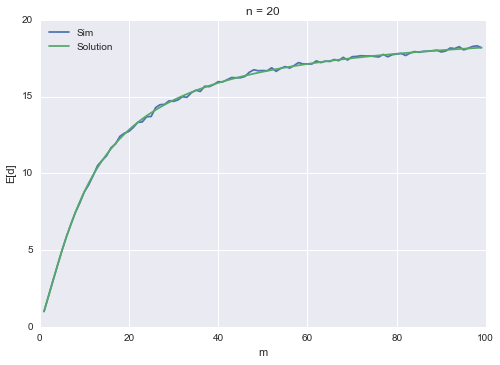

In [10]:
plot(arange(1, 100), [num_pressed(20, i, n_samps=200) for i in range(1, 100)], label='Sim')
plot(arange(1, 100), [get_expected_d(20, i) for i in range(1, 100)], label='Solution')
xlabel('m')
ylabel('E[d]')
title('n = 20')
legend(loc=2)

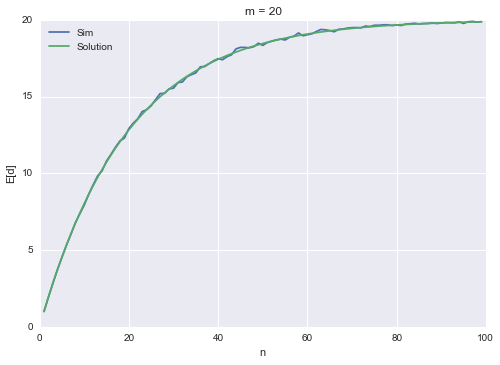

In [11]:
plot(arange(1, 100), [num_pressed(i, 20, n_samps=200) for i in range(1, 100)], label='Sim')
plot(arange(1, 100), [get_expected_d(i, 20) for i in range(1, 100)], label='Solution')
xlabel('n')
ylabel('E[d]')
title('m = 20')
legend(loc=2)